In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
import csv
import pandas as pd

In [3]:
error = ctrl.Antecedent(np.arange(-376, 377, 1), 'error')
delta_error = ctrl.Antecedent(np.arange(-376, 377, 1), 'delta_error')
speed = ctrl.Consequent(np.arange(-12, 19, 1), 'speed')

# Define fuzzy sets for error
error['negative'] = fuzz.trapmf(error.universe, [-376, -376, -100, 0])
error['zero'] = fuzz.trimf(error.universe, [-50, 0, 50])
error['positive'] = fuzz.trapmf(error.universe, [0, 100, 376, 376])
    
# Define fuzzy sets for delta_error
delta_error['negative'] = fuzz.trapmf(delta_error.universe, [-376, -376, -80, 0])
delta_error['zero'] = fuzz.trimf(delta_error.universe, [-30, 0, 30])
delta_error['positive'] = fuzz.trapmf(delta_error.universe, [0, 80, 376, 376])

speed['negative medium'] = fuzz.trimf(speed.universe, [-12, -12, -4])
speed['negative low'] = fuzz.trimf(speed.universe, [-6, 0, 0])
speed['low'] = fuzz.trimf(speed.universe, [0, 0, 6])
speed['medium'] = fuzz.trimf(speed.universe, [4, 9, 14])
speed['fast'] = fuzz.trimf(speed.universe, [10, 18, 18])

C:\Users\acer\miniconda3\envs\fuzzy\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


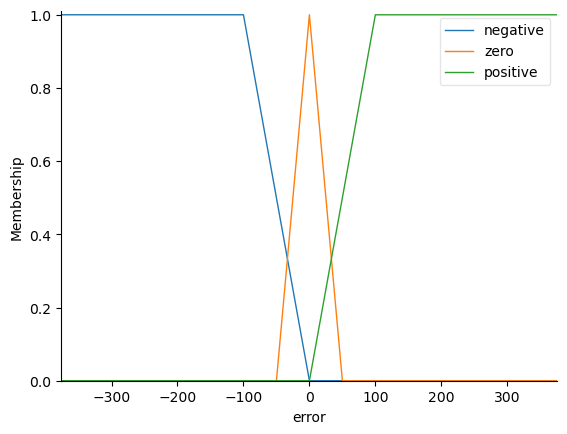

In [4]:
error.view()
plt.show()

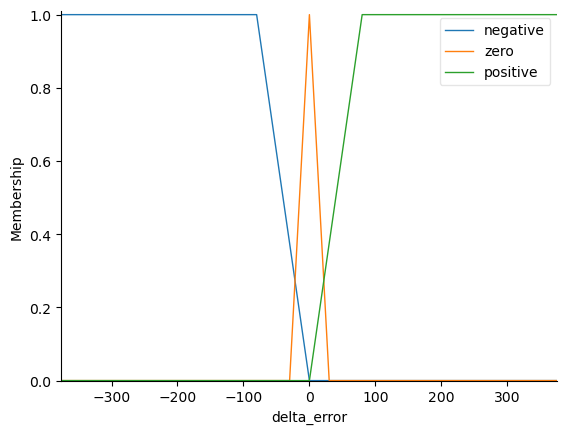

In [5]:
delta_error.view()
plt.show()

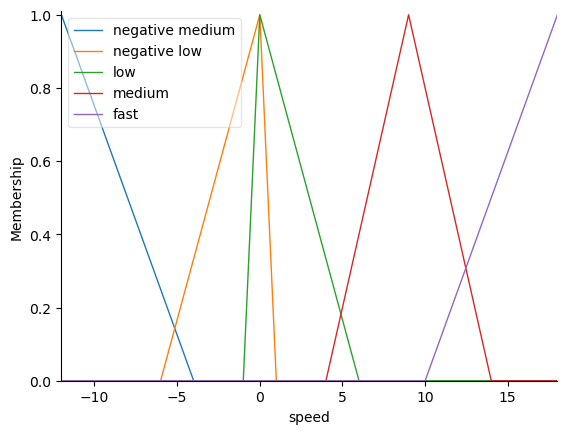

In [6]:
speed.view()
plt.show()

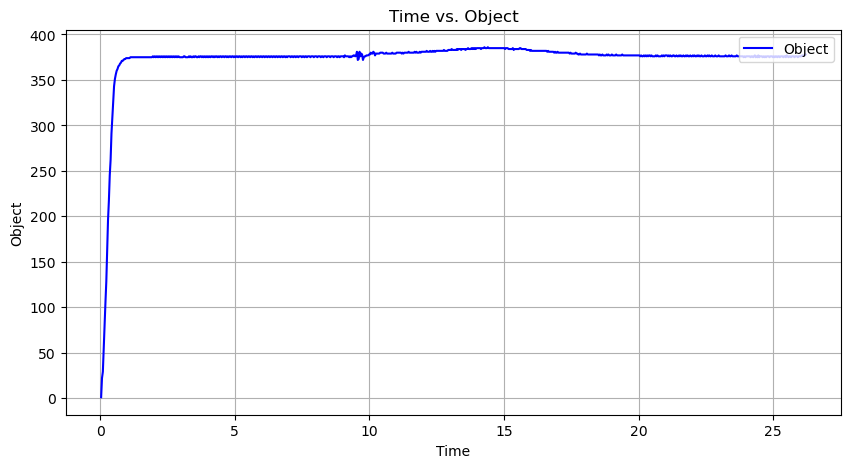

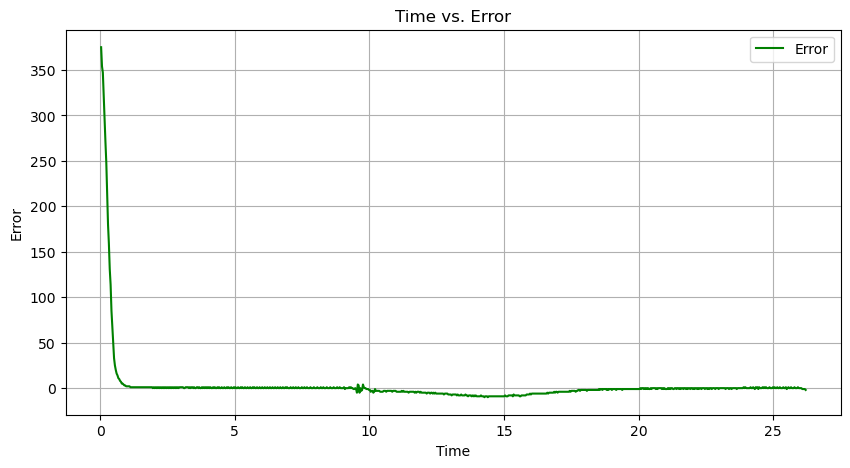

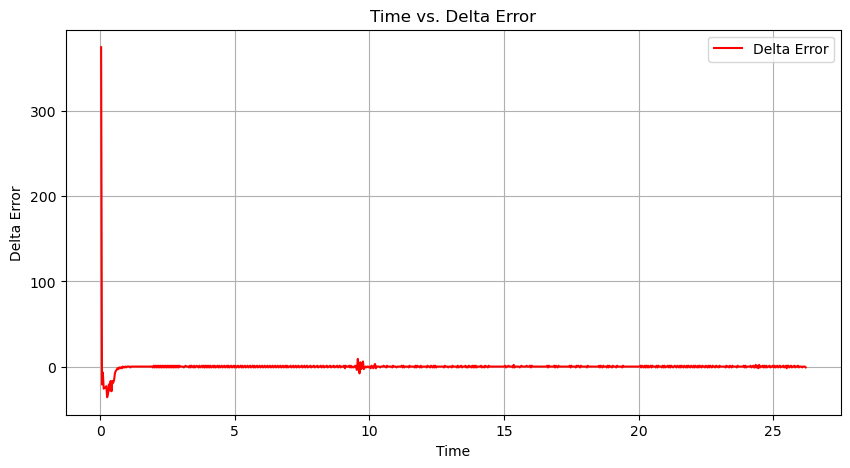

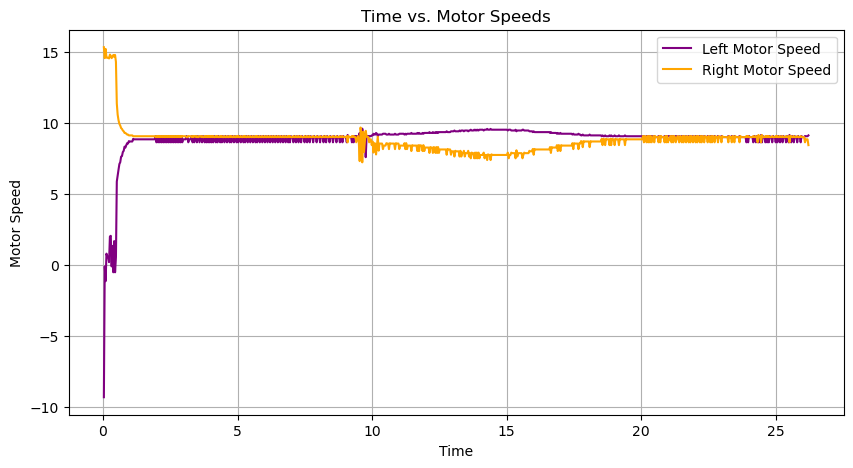

In [30]:
file_path = r'D:\Sistem Kendali Cerdas\projek_akhir\controllers\flc_dinamic_object\hasilSimulasi.csv'

# Baca file CSV
data = pd.read_csv(file_path)

# Plot Time vs. Object
plt.figure(figsize=(10, 5))
plt.plot(data['Time'], data['Object'], label='Object', color='blue')
plt.ylabel('Object')
plt.xlabel('Time')
plt.legend(loc='upper right')
plt.grid(True)
plt.title('Time vs. Object')
plt.show()

# Plot Time vs. Error
plt.figure(figsize=(10, 5))
plt.plot(data['Time'], data['Error'], label='Error', color='green')
plt.ylabel('Error')
plt.xlabel('Time')
plt.legend(loc='upper right')
plt.grid(True)
plt.title('Time vs. Error')
plt.show()

# Plot Time vs. Delta Error
plt.figure(figsize=(10, 5))
plt.plot(data['Time'], data['Delta Error'], label='Delta Error', color='red')
plt.ylabel('Delta Error')
plt.xlabel('Time')
plt.legend(loc='upper right')
plt.grid(True)
plt.title('Time vs. Delta Error')
plt.show()

# Plot Time vs. Left Motor Speed
plt.figure(figsize=(10, 5))
plt.plot(data['Time'], data['Left Motor'], label='Left Motor Speed', color='purple')
plt.plot(data['Time'], data['Right Motor'], label='Right Motor Speed', color='orange')
plt.ylabel('Motor Speed')
plt.xlabel('Time')
plt.legend(loc='upper right')
plt.grid(True)
plt.title('Time vs. Motor Speeds')
plt.show()

In [31]:
setpoint = 376
rise_lower = 0.1 * setpoint  # 10% dari setpoint
rise_upper = 0.9 * setpoint  # 90% dari setpoint
settling_lower = 0.95 * setpoint 
settling_upper = 1.05 * setpoint

# Cari waktu awal rise time
rise_start = None
for i in range(len(data)):
    if data['Object'][i] > rise_lower:
        rise_start = data['Time'][i]
        break

# Cari waktu akhir rise time
rise_end = None
for i in range(len(data)):
    if data['Object'][i] > rise_upper:
        rise_end = data['Time'][i]
        break
        
# Cari waktu awal settling time
settling_start = None
for i in range(len(data)):
    if data['Object'][i] > settling_lower:
        settling_start = data['Time'][i]
        break

# Cari waktu akhir settling time
settling_end = None
for i in range(len(data)):
    if data['Object'][i] < settling_lower or data['Object'][i] > settling_upper:
        settling_end = data['Time'][i]
        break
        
# Hitung rise time jika ditemukan rise_start dan rise_end
if rise_start is not None and rise_end is not None:
    rise_time = rise_end - rise_start
    print(f"Rise Time: {rise_time} seconds")

# Hitung settling time jika ditemukan settling_start dan settling_end
if settling_start is not None and settling_end is not None:
    settling_time = settling_start - settling_end
    print(f"Settling Time: {settling_time} seconds")

# Temukan indeks data setelah rise_time + settling_time
if rise_time is not None and settling_time is not None:
    total_time = rise_time + settling_time
    steady_state_index = data[data['Time'] > total_time].index[0]

    # Ambil nilai Object setelah waktu rise_time + settling_time
    steady_state_value = data.loc[steady_state_index:, 'Object']

    # Hitung rata-rata nilai
    steady_state = steady_state_value.mean()

    # Hitung steady state error
    steady_state_error = steady_state - setpoint
    print(f"Steady State Error: {steady_state_error}")

# Subset data hingga baris ke-604
subset_data = data.iloc[:604]

# Hitung rata-rata error dan delta error hingga baris ke-604
average_error = subset_data['Error'].mean()
average_delta_error = subset_data['Delta Error'].mean()

print(f'Rata-rata Error hingga baris ke-604: {average_error}')
print(f'Rata-rata Delta Error hingga baris ke-604: {average_delta_error}')

setpoint_tolerance = 2  # Toleransi untuk mendekati setpoint
setpoint_time = None

for index, row in data.iterrows():
    if abs(row['Object'] - setpoint) <= setpoint_tolerance:
        setpoint_time = row['Time']
        break

if setpoint_time is not None:
    print(f'Waktu saat mencapai setpoint pertama ({setpoint}): {setpoint_time}')
else:
    print('Setpoint tidak tercapai dalam data.')

Rise Time: 0.384 seconds
Settling Time: 0.576 seconds
Steady State Error: 1.8618504435995078
Rata-rata Error hingga baris ke-604: 3.2417218543046356
Rata-rata Delta Error hingga baris ke-604: -0.0016556291390728477
Waktu saat mencapai setpoint pertama (376): 0.96
